In [1]:
import numpy as np
import pandas as pd
import re,os
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns

In [2]:
metaphlan = pd.read_csv("/home/bruce1996/data/MCI/manuscript_v3/normal/abundance_matrix/normal_abundance_matrix.txt",sep='\t',index_col=0)
l_subtype_m = pd.read_csv("/home/bruce1996/data/MCI/manuscript_v3/normal/abundance_matrix/normal_lacto_subtype_without_rogosae_abundance_matrix.txt",sep='\t',index_col=0)

In [3]:
bifido = metaphlan.loc[metaphlan.index.str.contains("Bifidobacterium"),:]
lacto = metaphlan.loc[metaphlan.index.str.contains("Lactobacillus"),:]

In [10]:
prevalence = lambda x : (sum(x > 0) / len(x)) * 100
bifido_pv = bifido.apply(prevalence,axis=1)
bifido_mean = bifido.mean(axis=1)
lacto_pv = lacto.apply(prevalence,axis=1)
lacto_mean = lacto.mean(axis=1)

In [17]:
bifido_plot_df = pd.DataFrame({'Prevalence' : bifido_pv.values,'Mean relative abundance' : bifido_mean.values},index=[x[3:] for x in bifido.index])
lacto_plot_df = pd.DataFrame({'Prevalence' : lacto_pv.values,'Mean relative abundance' : lacto_mean.values},index = [x[3:] for x in lacto.index])
lacto_subtype_df = pd.DataFrame({'Prevalence' : l_subtype_m.apply(prevalence,axis=1).values,
                                 'Mean relative abundance' : l_subtype_m.mean(axis=1).values},index = l_subtype_m.index)

In [25]:
from manuscript.subtype import *

In [30]:
subtype_reference = pd.read_csv("/home/bruce1996/data/MCI/subtyping/Lactobacillus_group.csv")
subtype_reference = pd.read_csv("/home/bruce1996/data/MCI/subtyping/Lactobacillus_group.csv")
subtype_matrix,subtype_d = metaphlan_subtype(lacto,subtype_reference,'Lactobacillus','species','phylogroup')

In [47]:
table_s1 = pd.DataFrame()
for subtype in subtype_d.keys() :
    if subtype == 'Rogosae_subtype' :
        continue
    tmp = pd.DataFrame({'Prevalence' : lacto_subtype_df.loc[subtype,'Prevalence'],'Mean relative abundance' : lacto_subtype_df.loc[subtype,'Mean relative abundance'] },index=[subtype])
    table_s1 = pd.concat([table_s1,tmp],axis=0)
    species = subtype_d[subtype] 
    species = [ x[3:] for x in species]
    if len(species) == 1 :
        tmp = pd.DataFrame({'Prevalence' : lacto_plot_df.loc[species,'Prevalence'],'Mean relative abundance' : lacto_plot_df.loc[species,'Mean relative abundance'] })
        table_s1 = pd.concat([table_s1,tmp],axis=0)
    else :
        table_s1 = pd.concat([table_s1,lacto_plot_df.loc[species,:]],axis=0)

In [49]:
table_s1.to_csv("/home/bruce1996/data/MCI/manuscript_v3/supplement/subtype/lacto_and_subtype_pv_abundance.txt",sep='\t')

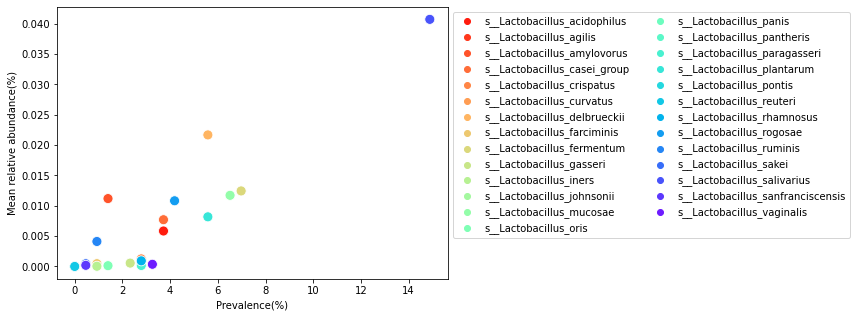

In [42]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=lacto_plot_df,x='Prevalence',y='Mean relative abundance',hue='Species',palette="rainbow_r",s=100)
plt.xlabel("Prevalence(%)")
plt.ylabel("Mean relative abundance(%)")
plt.legend(bbox_to_anchor=[1,1],ncol=2)
plt.savefig("/home/bruce1996/data/MCI/manuscript_v3/supplement/abundance_prevalence/normal_lacto_prevalence_abundance_scatterplot.png",dpi=300,bbox_inches='tight')